In [0]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics 
from tqdm import tqdm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
%cd /content/drive/'My Drive'/viscosity
%ls

/content/drive/.shortcut-targets-by-id/1BcMRR0Kl32WRQZtpxukCL46x08j_tbx9/viscosity
'Fly ash_USC.csv'               viscosity_v2.xlsx
 viscosity_1000_new.ipynb       viscosity_v5_1000.xlsx
'viscosity_100_new (1).ipynb'   viscosity_v5_100.xlsx
'viscosity_10 (1).ipynb'        viscosity_v5_10.xlsx
 viscosity.ipynb


In [0]:
viscosity = pd.read_excel("viscosity_v5_100.xlsx")

In [7]:
print(viscosity.columns)

Index(['Glass_ID', 'SiO2', 'B2O3', 'Al2O3', 'MgO', 'CaO', 'BaO', 'Li2O',
       'Na2O', 'K2O', 'Rb2O', 'Cs2O', 'BeO', 'MnO', 'FeO', 'CoO', 'NiO', 'CuO',
       'ZnO', 'SrO', 'CdO', 'PbO', 'SnO', 'Cr2O3', 'Fe2O3', 'Ga2O3', 'As2O3',
       'Y2O3', 'In2O3', 'Sb2O3', 'La2O3', 'Nd2O3', 'Gd2O3', 'Bi2O3', 'Co2O3',
       'Sc2O3', 'Co3O4', 'Mn3O4', 'Fe3O4', 'TiO2', 'MnO2', 'GeO2', 'ZrO2',
       'CeO2', 'SnO2', 'TeO2', 'P2O5', 'V2O5', 'Nb2O5', 'Ta2O5', 'SO3', 'MoO3',
       'WO3', 'H2O', 'log 10 value', 'Temperature_C', 'prop_id', 'unit',
       'note', 'source'],
      dtype='object')


In [0]:
X_idx=[]
for i in range(1,54):
  X_idx.append(i)
X_idx.append(55)

In [9]:
viscosity.iloc[:,X_idx].head()

,SiO2,B2O3,Al2O3,MgO,CaO,BaO,Li2O,Na2O,K2O,Rb2O,Cs2O,BeO,MnO,FeO,CoO,NiO,CuO,ZnO,SrO,CdO,PbO,SnO,Cr2O3,Fe2O3,Ga2O3,As2O3,Y2O3,In2O3,Sb2O3,La2O3,Nd2O3,Gd2O3,Bi2O3,Co2O3,Sc2O3,Co3O4,Mn3O4,Fe3O4,TiO2,MnO2,GeO2,ZrO2,CeO2,SnO2,TeO2,P2O5,V2O5,Nb2O5,Ta2O5,SO3,MoO3,WO3,H2O,Temperature_C
0,0.0,55.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0
1,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0
2,0.0,65.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0


In [10]:
np.isnan(np.array(viscosity.iloc[:,55])).sum()

30

In [11]:
viscosity.iloc[np.isnan(np.array(viscosity.iloc[:,55])),55]

4773    NaN
4774    NaN
4974    NaN
4975    NaN
4976    NaN
9683    NaN
9684    NaN
13685   NaN
29494   NaN
33905   NaN
33906   NaN
33907   NaN
33914   NaN
33915   NaN
33936   NaN
40245   NaN
40246   NaN
46245   NaN
46467   NaN
46659   NaN
47073   NaN
47074   NaN
47275   NaN
47276   NaN
47277   NaN
48203   NaN
48967   NaN
49310   NaN
55529   NaN
68746   NaN
Name: Temperature_C, dtype: float64

In [0]:
remove = [4773    ,
4774    ,
4974    ,
4975    ,
4976    ,
9683    ,
9684    ,
13685   ,
29494   ,
33905   ,
33906   ,
33907   ,
33914   ,
33915   ,
33936   ,
40245   ,
40246   ,
46245   ,
46467   ,
46659   ,
47073   ,
47074   ,
47275   ,
47276   ,
47277   ,
48203   ,
48967   ,
49310   ,
55529   ,
68746   ]

In [0]:
viscosity = viscosity.drop(remove)

In [0]:
X = np.array(viscosity.iloc[:,X_idx])

In [0]:
y = np.array(viscosity.iloc[:,54])

In [16]:
X.shape

(98131, 54)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [0]:
X_train = torch.tensor(X_train, device="cuda").type(torch.float)
y_train = torch.tensor(y_train, device="cuda").type(torch.float)
X_test = torch.tensor(X_test, device="cuda").type(torch.float)
y_test = torch.tensor(y_test, device="cuda").type(torch.float)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([78504, 54]),
 torch.Size([78504]),
 torch.Size([19627, 54]),
 torch.Size([19627]))

In [20]:
X_mean = X_train.mean(dim=0)
X_std = X_train.std(dim=0)
y_mean = y_train.mean(dim=0)
y_std = y_train.std(dim=0)
X_mean.shape, X_std.shape, y_mean.shape, y_std.shape

(torch.Size([54]), torch.Size([54]), torch.Size([]), torch.Size([]))

In [0]:
class CustomDataset(Dataset):
    def __init__(self, X, y, transform=None, target_transform=None):
        super().__init__()
        self.X = X
        self.y = y
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        if self.transform:
            X = self.transform(X)

        if self.target_transform is not None:
            y = self.target_transform(y)
        return X, y

In [0]:
training_set = CustomDataset(X_train, 
                             y_train, 
                             transform=lambda X: ((X - X_mean)/X_std), 
                             target_transform=lambda y: ((y - y_mean)/y_std)
                          )

test_set = CustomDataset(X_test,
                        y_test,
                        transform=lambda X: ((X - X_mean)/X_std), 
                        target_transform=lambda y: ((y - y_mean)/y_std)
                    )

In [23]:
"""net = torch.nn.Sequential(
    torch.nn.Linear(54, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),   
    torch.nn.Linear(512, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 128),
    torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(128, 64),
    torch.nn.BatchNorm1d(64),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(64, 1))"""

'net = torch.nn.Sequential(\n    torch.nn.Linear(54, 256),\n    torch.nn.BatchNorm1d(256),\n    torch.nn.ReLU(),\n    torch.nn.Dropout(p=0.1),\n    torch.nn.Linear(256, 512),\n    torch.nn.BatchNorm1d(512),\n    torch.nn.ReLU(),  \n    torch.nn.Dropout(p=0.1),   \n    torch.nn.Linear(512, 256),\n    torch.nn.BatchNorm1d(256),\n    torch.nn.ReLU(),  \n    torch.nn.Dropout(p=0.1),\n    torch.nn.Linear(256, 128),\n    torch.nn.BatchNorm1d(128),\n    torch.nn.ReLU(),  \n    torch.nn.Dropout(p=0.1),\n    torch.nn.Linear(128, 64),\n    torch.nn.BatchNorm1d(64),\n    torch.nn.ReLU(),  \n    torch.nn.Dropout(p=0.1),\n    torch.nn.Linear(64, 1))'

In [24]:
net = torch.nn.Sequential(
    torch.nn.Linear(54, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
  #  torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),  
 #   torch.nn.Dropout(p=0.1),   
    torch.nn.Linear(512, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),  
   # torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 128),
    torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),  
  #  torch.nn.Dropout(p=0.1),
    torch.nn.Linear(128, 64),
    torch.nn.BatchNorm1d(64),
    torch.nn.ReLU(),  
 #   torch.nn.Dropout(p=0.1),
    torch.nn.Linear(64, 1))

batch_size = 128
epoch_total = 100
step1 = 30
step2 = 50
step3 = 80
warmup_epoch = 10

def lr_lambda(epoch):
    # if epoch >= step3:
    #     lr = 0.001
    # elif epoch >= step2:
    #     lr = 0.01
    # elif epoch >= step1:
    #     lr = 0.1
    # else:
    #     lr = 1

    # if epoch < warmup_epoch:
    #     lr = lr * (1 + epoch) / warmup_epoch
    lr = 0.001
    return lr

optimizer = torch.optim.Adam([param for param in net.parameters() if param.requires_grad], lr=0.01, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

loss_func = torch.nn.MSELoss(reduction="none")

train_loader = DataLoader(
    dataset=training_set,
    batch_size=batch_size, 
    shuffle=True)

test_loader = DataLoader(
    dataset=test_set,
    batch_size=batch_size, 
    shuffle=False)

net = net.cuda()

train_losses = []
test_losses = []
test_r2 = []
train_r2 = []
# start training
#for epoch in tqdm(range(epoch_total)):
for epoch in range(epoch_total):
    # print('Epoch = %d' % epoch + 1)
    net.train()
    train_targets = []
    train_predictions = []
    total_loss = None
    for step, (batch_X, batch_y) in enumerate(train_loader): # for each training step
        optimizer.zero_grad()   # clear gradients for next train
        
        prediction = net(batch_X).squeeze(dim=1)     # input x and predict based on x
        loss = loss_func(prediction, batch_y)     # must be (1. nn output, 2. target)
        current_loss = loss.sum()

        if total_loss is None:
            total_loss = current_loss
        else:
            total_loss += current_loss
        
        loss = loss.mean()
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        train_targets += [batch_y]
        train_predictions += [prediction]
    
    with torch.no_grad():
        train_targets = torch.cat(train_targets, dim=0)
        train_predictions = torch.cat(train_predictions, dim=0)
        total_loss = total_loss / train_targets.shape[0]
        train_losses += [total_loss.item()]
        train_r2.append(sklearn.metrics.r2_score((train_targets * y_std + y_mean).cpu().numpy(), (train_predictions * y_std + y_mean).cpu().numpy()))
        print('Epoch %d: Training Loss = %.4f' % (epoch + 1, total_loss.item()))

    with torch.no_grad():
        net.eval()
        test_targets = []
        test_predictions = []
        total_loss = None
        for (batch_X, batch_y) in test_loader: # for each training step
            prediction = net(batch_X).squeeze(dim=1)     # input x and predict based on x
            current_loss = loss_func(prediction, batch_y).sum()
            if total_loss is None:
                total_loss = current_loss
            else:
                total_loss += current_loss
            test_targets += [batch_y]
            test_predictions += [prediction]
        test_targets = torch.cat(test_targets, dim=0)
        test_predictions = torch.cat(test_predictions, dim=0)
        test_r2.append(sklearn.metrics.r2_score((test_targets * y_std + y_mean).cpu().numpy(), (test_predictions * y_std + y_mean).cpu().numpy()))
        
        total_loss = total_loss / test_targets.shape[0]
        test_losses.append(total_loss.item())
        print("Epoch %d: Validation Loss = %.4f" % (epoch + 1, total_loss.item()))

    lr_scheduler.step()


Epoch 1: Training Loss = 0.5405
Epoch 1: Validation Loss = 0.2767
Epoch 2: Training Loss = 0.2191
Epoch 2: Validation Loss = 0.1816
Epoch 3: Training Loss = 0.1703
Epoch 3: Validation Loss = 0.1555
Epoch 4: Training Loss = 0.1469
Epoch 4: Validation Loss = 0.1591
Epoch 5: Training Loss = 0.1342
Epoch 5: Validation Loss = 0.1353
Epoch 6: Training Loss = 0.1236
Epoch 6: Validation Loss = 0.1272
Epoch 7: Training Loss = 0.1183
Epoch 7: Validation Loss = 0.1206
Epoch 8: Training Loss = 0.1101
Epoch 8: Validation Loss = 0.1370
Epoch 9: Training Loss = 0.1095
Epoch 9: Validation Loss = 0.1434
Epoch 10: Training Loss = 0.1053
Epoch 10: Validation Loss = 0.1341
Epoch 11: Training Loss = 0.1022
Epoch 11: Validation Loss = 0.2148
Epoch 12: Training Loss = 0.1012
Epoch 12: Validation Loss = 0.1155
Epoch 13: Training Loss = 0.0972
Epoch 13: Validation Loss = 0.1315
Epoch 14: Training Loss = 0.0950
Epoch 14: Validation Loss = 0.1219
Epoch 15: Training Loss = 0.0951
Epoch 15: Validation Loss = 0.173

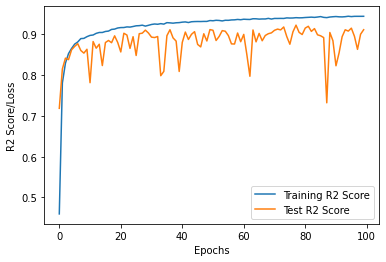

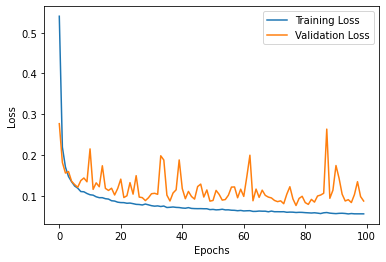

In [25]:
plt.plot(train_r2, label="Training R2 Score")
plt.plot(test_r2, label="Test R2 Score")
plt.ylabel('R2 Score/Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [26]:
train_r2

[0.45952003397861185,
 0.7808734849630254,
 0.8297240271025059,
 0.8530521082899045,
 0.8657766084573835,
 0.8763772488078427,
 0.8816627375350243,
 0.8899150527249873,
 0.8904807351612106,
 0.8946824904260647,
 0.8977597923355387,
 0.8987705320074467,
 0.90278418763104,
 0.9049527368708625,
 0.9049449802669078,
 0.9074435376932879,
 0.9083576531588747,
 0.912467951845234,
 0.9132533118798065,
 0.9159884867037478,
 0.9169908116739081,
 0.9171159350505735,
 0.9186327738587404,
 0.9181708866028359,
 0.9196331269548992,
 0.9213271865023644,
 0.9217042329096197,
 0.9228738228875175,
 0.9205833130229647,
 0.9225351651781017,
 0.9246143379990349,
 0.925770150893199,
 0.9251164891003644,
 0.926619308336085,
 0.9254804251059295,
 0.929066336521427,
 0.928552782294301,
 0.9277990454136997,
 0.9287771713556531,
 0.9291456693410067,
 0.9302918129139458,
 0.9308696060354116,
 0.9293922995312741,
 0.9312865545681801,
 0.9317290582603572,
 0.9319101074261349,
 0.9318295545235291,
 0.9321170838205899

In [27]:
test_r2

[0.7187564166805172,
 0.8154473947334472,
 0.8419241427133505,
 0.8383049190976971,
 0.8624832627736241,
 0.8707053533937227,
 0.877406923551051,
 0.860737176608829,
 0.8542813041226969,
 0.8637283566779451,
 0.7816682874563861,
 0.8826552421353032,
 0.8663742814074524,
 0.8760926416995357,
 0.8237530428947099,
 0.8802095245881393,
 0.8853299675837438,
 0.8798488751711653,
 0.8966614297984153,
 0.8804724493152275,
 0.8571500309903792,
 0.9030618770338621,
 0.898627781152368,
 0.8658406866079764,
 0.8945907249292164,
 0.8484774315265556,
 0.9019006427987658,
 0.9032698603972933,
 0.910711289291752,
 0.9035870163721688,
 0.8935188340254272,
 0.8924906708466079,
 0.8950161133996992,
 0.7988382063140546,
 0.8094485415510427,
 0.8970077270230267,
 0.9116549002393554,
 0.8917250941536518,
 0.8837664841132078,
 0.8092205769776766,
 0.8805616092424875,
 0.9059888884017072,
 0.8878073174182943,
 0.9004575582103482,
 0.9069565714599277,
 0.8756404246704771,
 0.8695298744031666,
 0.90181333169853

In [28]:
net = torch.nn.Sequential(
    torch.nn.Linear(54, 256),
 #   torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 512),
 #   torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),   
    torch.nn.Linear(512, 256),
 #   torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 128),
  #  torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(128, 64),
  #  torch.nn.BatchNorm1d(64),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(64, 1))

batch_size = 128
epoch_total = 100
step1 = 30
step2 = 50
step3 = 80
warmup_epoch = 10

def lr_lambda(epoch):
    if epoch >= step3:
        lr = 0.001
    elif epoch >= step2:
        lr = 0.01
    elif epoch >= step1:
        lr = 0.1
    else:
        lr = 1

    if epoch < warmup_epoch:
        lr = lr * (1 + epoch) / warmup_epoch
    
    return lr

optimizer = torch.optim.Adam([param for param in net.parameters() if param.requires_grad], lr=0.01, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

loss_func = torch.nn.MSELoss(reduction="none")

train_loader = DataLoader(
    dataset=training_set,
    batch_size=batch_size, 
    shuffle=True)

test_loader = DataLoader(
    dataset=test_set,
    batch_size=batch_size, 
    shuffle=False)

net = net.cuda()

train_losses = []
test_losses = []
test_r2 = []
train_r2 = []
# start training
#for epoch in tqdm(range(epoch_total)):
for epoch in range(epoch_total):
    # print('Epoch = %d' % epoch + 1)
    net.train()
    train_targets = []
    train_predictions = []
    total_loss = None
    for step, (batch_X, batch_y) in enumerate(train_loader): # for each training step
        optimizer.zero_grad()   # clear gradients for next train
        
        prediction = net(batch_X).squeeze(dim=1)     # input x and predict based on x
        loss = loss_func(prediction, batch_y)     # must be (1. nn output, 2. target)
        current_loss = loss.sum()

        if total_loss is None:
            total_loss = current_loss
        else:
            total_loss += current_loss
        
        loss = loss.mean()
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        train_targets += [batch_y]
        train_predictions += [prediction]
    
    with torch.no_grad():
        train_targets = torch.cat(train_targets, dim=0)
        train_predictions = torch.cat(train_predictions, dim=0)
        total_loss = total_loss / train_targets.shape[0]
        train_losses += [total_loss.item()]
        train_r2.append(sklearn.metrics.r2_score((train_targets * y_std + y_mean).cpu().numpy(), (train_predictions * y_std + y_mean).cpu().numpy()))
        print('Epoch %d: Training Loss = %.4f' % (epoch + 1, total_loss.item()))

    with torch.no_grad():
        net.eval()
        test_targets = []
        test_predictions = []
        total_loss = None
        for (batch_X, batch_y) in test_loader: # for each training step
            prediction = net(batch_X).squeeze(dim=1)     # input x and predict based on x
            current_loss = loss_func(prediction, batch_y).sum()
            if total_loss is None:
                total_loss = current_loss
            else:
                total_loss += current_loss
            test_targets += [batch_y]
            test_predictions += [prediction]
        test_targets = torch.cat(test_targets, dim=0)
        test_predictions = torch.cat(test_predictions, dim=0)
        test_r2.append(sklearn.metrics.r2_score((test_targets * y_std + y_mean).cpu().numpy(), (test_predictions * y_std + y_mean).cpu().numpy()))
        
        total_loss = total_loss / test_targets.shape[0]
        test_losses.append(total_loss.item())
        print("Epoch %d: Validation Loss = %.4f" % (epoch + 1, total_loss.item()))

    lr_scheduler.step()


Epoch 1: Training Loss = 0.1985
Epoch 1: Validation Loss = 0.0978
Epoch 2: Training Loss = 0.1309
Epoch 2: Validation Loss = 0.0933
Epoch 3: Training Loss = 0.1243
Epoch 3: Validation Loss = 0.1173
Epoch 4: Training Loss = 0.1378
Epoch 4: Validation Loss = 0.1114


KeyboardInterrupt: ignored

In [0]:
plt.plot(train_r2, label="Training R2 Score")
plt.plot(test_r2, label="Test R2 Score")
plt.ylabel('R2 Score/Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [0]:
train_r2

In [0]:
test_r2